In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Out to 10^4 AU#

In [2]:
lines = open('GAIA_10kAU.csv').readlines()

In [3]:
lines[0]

'source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error\n'

In [4]:
host_star = lines[18].split(',')
host_pmra = float(host_star[7]); host_pmra_error = float(host_star[8])
host_pmdec = float(host_star[9]); host_pmdec_error = float(host_star[10])

In [5]:
pmra = []; pmra_error = []
pmdec = []; pmdec_error = []
for line in lines[2:-1]:
    line_list = line.split(',')
    pmra_value = float(line_list[7]); pmra_error_value = float(line_list[8])
    pmdec_value = float(line_list[9]); pmdec_error_value = float(line_list[10])
    pmra.append(pmra_value); pmra_error.append(pmra_error_value)
    pmdec.append(pmdec_value); pmdec_error.append(pmdec_error_value)

Text(0,0.5,'pm dec (mas/yr)')

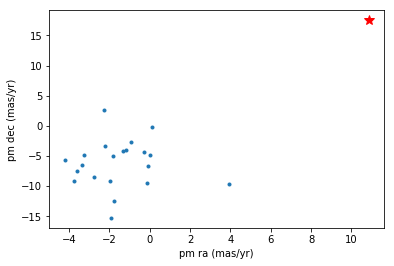

In [6]:
plt.plot(pmra, pmdec, '.')
plt.plot([10.865226523642436], [17.51967606550108], 'r*', markersize=10)
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')

Text(0,0.5,'pm dec (mas/yr)')

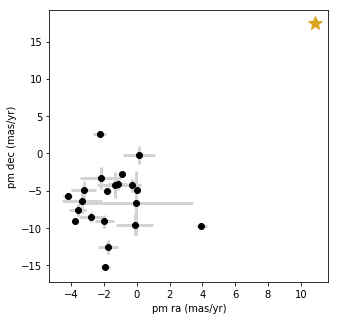

In [7]:
plt.figure(figsize=(5,5))
plt.errorbar(pmra, pmdec, yerr=pmdec_error, xerr=pmra_error,
             fmt='ok', ecolor='lightgray', elinewidth=3)
plt.errorbar(host_pmra, host_pmdec, yerr=host_pmdec_error, xerr=host_pmra_error,
            color='goldenrod', fmt='*', markersize=15)
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')
#plt.xlim(-5,15);plt.ylim(-20,20)

# Out to 10^5 AU

In [8]:
lines2 = open('GAIA_100kAU.csv').readlines()

In [9]:
pmra2 = []; pmra_error2 = []
pmdec2 = []; pmdec_error2 = []
for line in lines2[1:]:
    line_list = line.split(',')
    try:
        pmra_value = float(line_list[7]); pmra_error_value = float(line_list[8])
        pmdec_value = float(line_list[9]); pmdec_error_value = float(line_list[10])
        pmra2.append(pmra_value); pmra_error2.append(pmra_error_value)
        pmdec2.append(pmdec_value); pmdec_error2.append(pmdec_error_value)
    except:
        pass
    

(0, 40)

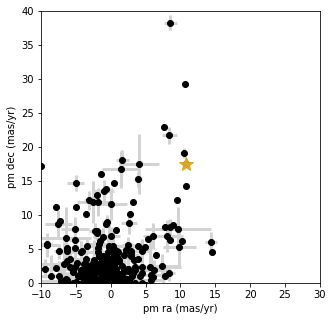

In [10]:
plt.figure(figsize=(5,5))
plt.errorbar(pmra2, pmdec2, yerr=pmdec_error2, xerr=pmra_error2,
             fmt='ok', ecolor='lightgray', elinewidth=3)
plt.errorbar(host_pmra, host_pmdec, yerr=host_pmdec_error, xerr=host_pmra_error,
            color='goldenrod', fmt='*', markersize=15)
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')
plt.xlim(-10,30)
plt.ylim(0,40)

Text(0,0.5,'pm dec (mas/yr)')

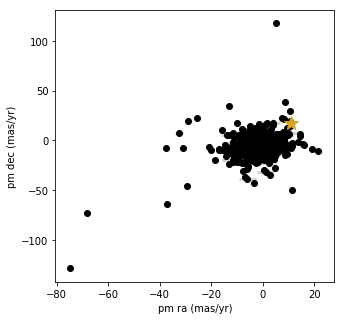

In [11]:
plt.figure(figsize=(5,5))
plt.errorbar(pmra2, pmdec2, yerr=pmdec_error2, xerr=pmra_error2,
             fmt='ok', ecolor='lightgray', elinewidth=3)
plt.errorbar(host_pmra, host_pmdec, yerr=host_pmdec_error, xerr=host_pmra_error,
            color='goldenrod', fmt='*', markersize=15)
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')

# Observing 5 closest targets #

In [12]:
import pandas as pd
table = pd.read_csv('GAIA_100kAU.csv')

In [26]:
# extract host star
host_star = table[table['source_id']==2103392720630278656]
host_ra = host_star['ra'].to_numpy()[0]; host_raerr = host_star['ra_error'].to_numpy()[0]
host_pmra = host_star['pmra'].to_numpy()[0]; host_pmraerr = host_star['pmra_error'].to_numpy()[0]

host_dec = host_star['dec'].to_numpy()[0]; host_decerr = host_star['dec_error'].to_numpy()[0]
host_pmdec = host_star['pmdec'].to_numpy()[0]; host_pmdecerr = host_star['pmdec_error'].to_numpy()[0]

In [27]:
# extract host star and 5 closes targets
window = 5.5
close_targets = table[(table['pmra']>(host_pmra-window)) & \
     (table['pmra']<(host_pmra+window)) & \
     (table['pmdec']>(host_pmdec-window))& \
     (table['pmdec']<(host_pmdec+window))]

In [35]:
close_targets

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
275,2103395087153992832,284.559567,0.242054,40.038543,0.336569,3.424492,0.309002,10.446570,0.527835,19.089082,0.688830
514,2103394404256680192,284.488569,0.019572,39.958321,0.021846,6.286502,0.023774,7.677502,0.044095,22.921915,0.042132
1027,2103392720630278656,284.472247,0.018309,39.911889,0.025516,5.351147,0.023872,10.865227,0.040243,17.519676,0.049306
1038,2103346193245935744,284.613968,0.207965,39.904295,0.226509,1.792738,0.236537,10.776942,0.452102,14.213601,0.395574
1313,2103251154208671744,284.409818,0.067965,39.792632,0.080975,1.161692,0.082914,9.507385,0.145224,12.209931,0.185530
1940,2103345712209562624,284.484674,0.480182,39.885502,0.690230,1.477631,0.609127,8.376107,1.076118,21.738059,1.262112


In [54]:
pmra = []; pmra_error = []
pmdec = []; pmdec_error = []
plx = []; d = []
for index,row in close_targets.iterrows():
    pmra.append(row['pmra']);pmra_error.append(row['pmra_error'])
    pmdec.append(row['pmdec']);pmdec_error.append(row['pmdec_error'])
    plx.append(row['parallax'])
    # compute separation in arcsec
    print(type(host_ra))
    d_ra = host_ra - row['ra']
    d_dec = host_dec - row['dec']
    distance = np.sqrt(d_ra**2.+d_dec**2.)*3600 # convert to milliarcsec
    d.append(distance)

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


(10.51967606550108, 24.51967606550108)

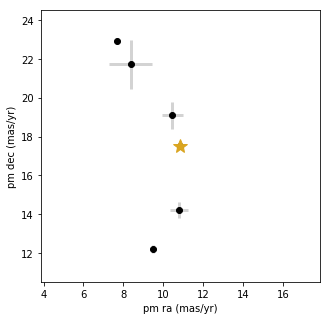

In [58]:
plt.figure(figsize=(5,5))
plt.errorbar(pmra, pmdec, yerr=pmdec_error, xerr=pmra_error,
             fmt='ok', ecolor='lightgray', elinewidth=3)
plt.errorbar(host_pmra, host_pmdec,\
             xerr=host_pmraerr, yerr=host_pmdecerr,
            color='goldenrod', fmt='*', markersize=15)
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')
plt.xlim(host_pmra-7,host_pmra+7)
plt.ylim(host_pmdec-7,host_pmdec+7)

(10.51967606550108, 24.51967606550108)

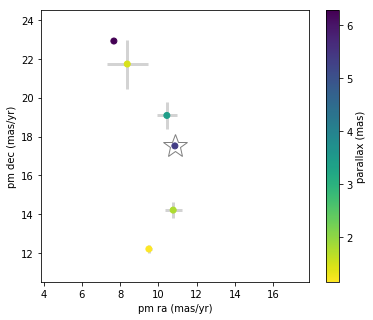

In [82]:
# color code according to parallax (distance)
plt.figure(figsize=(6,5))
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

plt.plot(host_pmra, host_pmdec,\
         '*', markersize=25,color='grey',fillstyle='none', markeredgecolor='grey')
plt.scatter(pmra, pmdec, c=plx, cmap='viridis_r',alpha=1, **scatter_kwargs)
plt.errorbar(pmra, pmdec, yerr=pmdec_error, xerr=pmra_error, \
             ecolor='lightgray', elinewidth=3, fmt='none', marker='none', mew=0, **error_kwargs)

plt.colorbar(label='parallax (mas)')
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')
plt.xlim(host_star['pmra'].to_numpy()[0]-7,host_star['pmra'].to_numpy()[0]+7)
plt.ylim(host_star['pmdec'].to_numpy()[0]-7,host_star['pmdec'].to_numpy()[0]+7)

(10.51967606550108, 24.51967606550108)

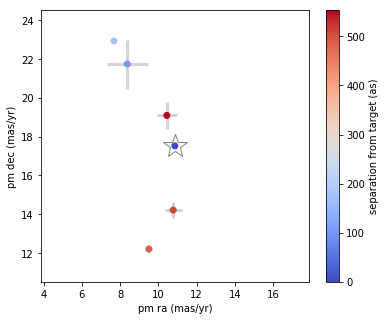

In [88]:
# color code according to separation on the sky
plt.figure(figsize=(6,5))

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":1}
star_kwargs = {"zorder":0}

plt.plot(host_pmra, host_pmdec,\
         '*', markersize=25,color='white',fillstyle='full', \
         markeredgecolor='grey', **star_kwargs)
plt.scatter(pmra, pmdec, c=d, cmap='coolwarm', **scatter_kwargs)
plt.errorbar(pmra, pmdec, yerr=pmdec_error, xerr=pmra_error, \
             ecolor='lightgray', elinewidth=3, fmt='none', marker='none', mew=0, **error_kwargs)


plt.colorbar(label='separation from target (as)')
plt.xlabel('pm ra (mas/yr)')
plt.ylabel('pm dec (mas/yr)')
plt.xlim(host_star['pmra'].to_numpy()[0]-7,host_star['pmra'].to_numpy()[0]+7)
plt.ylim(host_star['pmdec'].to_numpy()[0]-7,host_star['pmdec'].to_numpy()[0]+7)

In [ ]:
# to do: use parallax to find distance, then get XYZ coordinates of each one using
# code from Trevor
# then use XYZ to find the distance to the target star!!